BDA105 Project Haluk Erhan

In [1353]:
import findspark
findspark.init()

findspark.find()
import pyspark
findspark.find()

'C:\\spark\\spark-2.4.3-bin-hadoop2.7'

In [1354]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('random_forest').getOrCreate()

Print environment variables inside jupyter notebook.

In [1355]:
import os
print(os.environ['SPARK_HOME'])
print(os.environ['JAVA_HOME'])
print(os.environ['PATH'])

C:\spark\spark-2.4.3-bin-hadoop2.7
C:\Program Files\Java\jdk1.8.0_221
C:\Users\haluk\Anaconda3;C:\Users\haluk\Anaconda3\Library\mingw-w64\bin;C:\Users\haluk\Anaconda3\Library\usr\bin;C:\Users\haluk\Anaconda3\Library\bin;C:\Users\haluk\Anaconda3\Scripts;C:\Program Files (x86)\Common Files\Oracle\Java\javapath;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0\;C:\Windows\System32\OpenSSH\;C:\Program Files (x86)\Intel\Intel(R) Management Engine Components\DAL;C:\Program Files\Intel\Intel(R) Management Engine Components\DAL;C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common;C:\Program Files\NVIDIA Corporation\NVIDIA NvDLISR;C:\Program Files\Java\jdk1.8.0_221\bin;C:\spark\spark-2.4.3-bin-hadoop2.7\bin;


In [1356]:
#OTHER REQUIRED PACKAGES
import pandas as pd
from functools import reduce
import time

In [1357]:
start_time = time.time()
df=spark.read.csv('E:\\BDA 105\\Files\\Dataset.csv', inferSchema=True, header=False, sep=',')
elapsed_time = time.time() - start_time
print (elapsed_time, 'sec')


0.5839354991912842 sec


In [1358]:
df.printSchema() #The nullable property indicates if the corresponding column can assume null values (true) or not (false).

root
 |-- _c0: integer (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: integer (nullable = true)
 |-- _c6: double (nullable = true)
 |-- _c7: double (nullable = true)
 |-- _c8: double (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: integer (nullable = true)
 |-- _c14: integer (nullable = true)
 |-- _c15: integer (nullable = true)
 |-- _c16: integer (nullable = true)
 |-- _c17: integer (nullable = true)
 |-- _c18: integer (nullable = true)
 |-- _c19: integer (nullable = true)
 |-- _c20: double (nullable = true)
 |-- _c21: integer (nullable = true)
 |-- _c22: integer (nullable = true)
 |-- _c23: integer (nullable = true)
 |-- _c24: integer (nullable = true)
 |-- _c25: string (nullable = true)
 |-- _c26: integer (nullable = true)
 |-- _c27: integer 

In [1359]:
col_names=pd.read_excel('E:\\BDA 105\\Files\\Dataset_Metadata.xlsx')

oldColumns=df.schema.names
newColumns=col_names['Dataset Metadata']

In [1360]:
#With below we are converting old column names with the ones given in metadata file. 

In [1361]:
df = reduce(lambda data, idx: data.withColumnRenamed(oldColumns[idx], newColumns[idx]), range(len(oldColumns)), df)

In [1362]:
df.printSchema()

root
 |-- TARGET: integer (nullable = true)
 |-- NAME_CONTRACT_TYPE: string (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- AMT_CREDIT: double (nullable = true)
 |-- AMT_ANNUITY: double (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- DAYS_BIRTH: integer (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- OWN_CAR_AGE: integer (nullable = true)
 |-- FLAG_MOBIL: integer (nullable = true)
 |-- FLAG_EMP_PHONE: integer (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_CONT_MOBILE: integer (nullable = true)
 |-- FLAG_PHONE: double (nullable = true)
 |-- OCCUPATION_TYPE: integer (nul

In [1363]:
df.columns

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'ORGANIZATION_TYPE',
 'REG_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_LIVE_REGION',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10']

In [1364]:
df.select('REG_REGION_NOT_WORK_REGION','ORGANIZATION_TYPE').show(3)

+--------------------------+--------------------+
|REG_REGION_NOT_WORK_REGION|   ORGANIZATION_TYPE|
+--------------------------+--------------------+
|                         0|Business Entity T...|
|                         0|              School|
|                         0|          Government|
+--------------------------+--------------------+
only showing top 3 rows



In [1365]:
df.select('NAME_CONTRACT_TYPE').distinct().show()

+------------------+
|NAME_CONTRACT_TYPE|
+------------------+
|   Revolving loans|
|        Cash loans|
+------------------+



In [1366]:
parquet_path='E:\\BDA 105\\Files\\df_parquet'

Since the dataset is huge and involves a lot of columns, we can choose to
compress it and convert it into a parquet file format. It reduces the overall
size of the data and optimizes the performance while processing data
because it works on subsets of required columns instead of the entire data. 

In [1367]:
#df.write.format('parquet').save(parquet_path)

In [1368]:
df.describe().select('summary','NAME_CONTRACT_TYPE','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY').show()

+-------+------------------+------------------+------------------+------------------+
|summary|NAME_CONTRACT_TYPE|  AMT_INCOME_TOTAL|        AMT_CREDIT|       AMT_ANNUITY|
+-------+------------------+------------------+------------------+------------------+
|  count|            307497|            307497|            307497|            307497|
|   mean|              null| 168796.2092668709| 599027.0918984575| 27108.54534678387|
| stddev|              null|237127.59094150367|402493.94600611844|14493.778986791332|
|    min|        Cash loans|           25650.0|           45000.0|            1615.5|
|    max|   Revolving loans|            1.17E8|         4050000.0|          258025.5|
+-------+------------------+------------------+------------------+------------------+



In [1369]:
df.groupBy('NAME_CONTRACT_TYPE').count().show()

+------------------+------+
|NAME_CONTRACT_TYPE| count|
+------------------+------+
|   Revolving loans| 29277|
|        Cash loans|278220|
+------------------+------+



# Feature Engineering and Data Cleaning

Since machine learning models only consume data in a
numerical format, we have to adopt some technique to convert the
categorical data in a numerical form.

This is the part where we convert the categorical variable into numerical
form and create a single vector combining all the input features by using
Spark’s VectorAssembler.

The process includes Category Indexing, One-Hot Encoding and VectorAssembler a feature transformer that merges multiple columns into a vector column.

In [1370]:
from pyspark.sql.functions import isnan, when, count, col

In [1371]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import OneHotEncoder


NAME_CONTRACT_TYPE: Identification if loan is cash or revloving

In [1372]:
df.filter(df['NAME_CONTRACT_TYPE'].isNull()).count()

0

In [1373]:
NCT_indexer=StringIndexer(inputCol='NAME_CONTRACT_TYPE', outputCol='NCT').fit(df)
df=NCT_indexer.transform(df)
df.select('NAME_CONTRACT_TYPE','NCT').distinct().show()

+------------------+---+
|NAME_CONTRACT_TYPE|NCT|
+------------------+---+
|   Revolving loans|1.0|
|        Cash loans|0.0|
+------------------+---+



In [1374]:
NCT_encoder=OneHotEncoder(inputCol="NCT", outputCol="NCT_Vector")

In [1375]:
df = NCT_encoder.transform(df)

In [1376]:
df.select('NAME_CONTRACT_TYPE','NCT','NCT_Vector').distinct().show()

+------------------+---+-------------+
|NAME_CONTRACT_TYPE|NCT|   NCT_Vector|
+------------------+---+-------------+
|   Revolving loans|1.0|    (1,[],[])|
|        Cash loans|0.0|(1,[0],[1.0])|
+------------------+---+-------------+



The final feature that we would be using for building Logistic
Regression is NCT_Vector. Let’s understand what these column
values represent.
(1,[0],[1.0]) represents a vector of length 1 , with 1 value :
Size of Vector – 1
Value contained in vector – 1.0
Position of 1.0 value in vector – 0th place

CODE_GENDER: Gender of client

In [1377]:
df.filter(df['CODE_GENDER'].isNull()).count()

0

In [1378]:
df.select('CODE_GENDER').distinct().show()

+-----------+
|CODE_GENDER|
+-----------+
|          F|
|          M|
|        XNA|
+-----------+



We have some XNA value which do not correspont with gender data. Let's deal with them. 

In [1379]:
df.filter(df['CODE_GENDER']=='XNA').count()

4

Since the number of irreklevant data is low we can treat them by dropping. 

In [1380]:
df=df.filter(df['CODE_GENDER']!='XNA')

In [1381]:
GENDER_indexer=StringIndexer(inputCol='CODE_GENDER', outputCol='GENDER').fit(df)
df=GENDER_indexer.transform(df)
df.select('CODE_GENDER','GENDER').distinct().show()

+-----------+------+
|CODE_GENDER|GENDER|
+-----------+------+
|          M|   1.0|
|          F|   0.0|
+-----------+------+



In [1382]:
GENDER_encoder=OneHotEncoder(inputCol="GENDER", outputCol="GENDER_Vector")
df = GENDER_encoder.transform(df)

FLAG_OWN_CAR: Flag if the client owns the car

In [1383]:
df.filter(df['FLAG_OWN_CAR'].isNull()).count()

0

In [1384]:
CAR_indexer=StringIndexer(inputCol='FLAG_OWN_CAR', outputCol='CAR').fit(df)
df=CAR_indexer.transform(df)
df.select('FLAG_OWN_CAR','CAR').distinct().show()

+------------+---+
|FLAG_OWN_CAR|CAR|
+------------+---+
|           Y|1.0|
|           N|0.0|
+------------+---+



In [1385]:
CAR_encoder=OneHotEncoder(inputCol="CAR", outputCol="CAR_Vector")
df = CAR_encoder.transform(df)

FLAG_OWN_REALTY: Flag if client owns a house or flat

In [1386]:
df.select('FLAG_OWN_REALTY').distinct().show()

+---------------+
|FLAG_OWN_REALTY|
+---------------+
|              Y|
|              N|
+---------------+



In [1387]:
df.filter(df['FLAG_OWN_REALTY'].isNull()).count()

0

In [1388]:
HOUSE_indexer=StringIndexer(inputCol='FLAG_OWN_REALTY', outputCol='HOUSE').fit(df)
df=HOUSE_indexer.transform(df)
df.select('FLAG_OWN_REALTY','HOUSE').distinct().show()

+---------------+-----+
|FLAG_OWN_REALTY|HOUSE|
+---------------+-----+
|              Y|  0.0|
|              N|  1.0|
+---------------+-----+



In [1389]:
HOUSE_encoder=OneHotEncoder(inputCol="HOUSE", outputCol="HOUSE_Vector")
df = HOUSE_encoder.transform(df)

CNT_CHILDREN:Number of children the client has

In [1390]:
df.select('CNT_CHILDREN').distinct().orderBy("CNT_CHILDREN", ascending=False).show()

+------------+
|CNT_CHILDREN|
+------------+
|          19|
|          14|
|          12|
|          11|
|          10|
|           9|
|           8|
|           7|
|           6|
|           5|
|           4|
|           3|
|           2|
|           1|
|           0|
+------------+



In [1391]:
df.filter(df['CNT_CHILDREN']>8).count()

12

The number of children of an household more than 8 is assumed to be an irrelevant value, so we will drop them in order to retrive logical solutions.

In [1392]:
df=df.filter(df['CNT_CHILDREN']<8)

In [1393]:
df.count()

307479

AMT_INCOME_TOTAL: Income of the client

DEALING WITH OUTLIERS

As seee in the boxplot, income values has outiler which can be assumed more then 200000. So, in order to get reasonable data we will drop the annual inco over that cut off value. 

Before we tackle how to handle them, let’s quickly define what an outlier is.  An outlier is any data point that is distinctly different from the rest of your data points. When you’re looking at a variable that is relatively normally distributed, you can think of outliers as anything that falls 3 or more standard deviations from its mean. While this will suffice as a working definition, keep in mind that there’s no golden rule for defining what an outlier is.

In general, outliers belong to one of two categories: a mistake in the data or a true outlier. The first type, a mistake in the data, could be as simple as typing 300 rather than 3.0 – resulting in a big shift as we’re analyzing the data later on. The second type, a true outlier, would be something like finding extreme values in the dataset. It’s important to distinguish these types because we’ll handle them differently in an analysis. It’s subjective. 




In [1394]:
df_income=df.select('AMT_INCOME_TOTAL')
df_income.describe().show()

+-------+------------------+
|summary|  AMT_INCOME_TOTAL|
+-------+------------------+
|  count|            307479|
|   mean|168796.41686402974|
| stddev| 237133.5836665803|
|    min|           25650.0|
|    max|            1.17E8|
+-------+------------------+



In [1395]:
df_income.toPandas()['AMT_INCOME_TOTAL'].mean()+3*df_income.toPandas()['AMT_INCOME_TOTAL'].std()

880197.1678638293

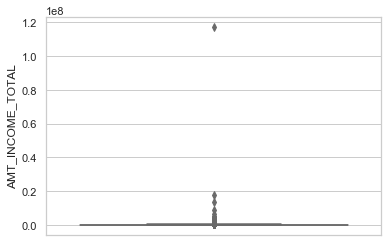

In [1396]:
import seaborn as sns
sns.set(style="whitegrid")
ax=sns.boxplot(y=df_income.toPandas()["AMT_INCOME_TOTAL"],palette='Set3')


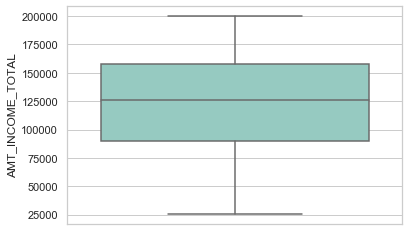

In [1397]:
df_income=df_income.filter(df_income['AMT_INCOME_TOTAL']<200000)
ax=sns.boxplot(y=df_income.toPandas()["AMT_INCOME_TOTAL"],palette='Set3')


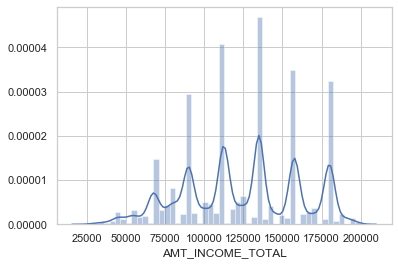

In [1398]:
#sns.kdeplot(df_income.toPandas()["AMT_INCOME_TOTAL"], shade=True)
#plt.hist(df_income.toPandas()["AMT_INCOME_TOTAL"], density=True, alpha=0.5)
sns.distplot(df_income.toPandas()["AMT_INCOME_TOTAL"])

As seen in the plot, we need to assign a cut off range in terms of annual income below 200000.

In [1399]:
df=df.filter(df["AMT_INCOME_TOTAL"]<200000)

In [1400]:
df.count()

219578

In [1401]:
print('We are still keeping', round(df.count()/307493,2), 'of whole dataset')

We are still keeping 0.71 of whole dataset


AMT_CREDIT: Credit amount of the loan

In [1402]:
df_credit=df.select('AMT_CREDIT')
df_credit.describe().show()

+-------+------------------+
|summary|        AMT_CREDIT|
+-------+------------------+
|  count|            219578|
|   mean|515054.34125914256|
| stddev|  341663.391627658|
|    min|           45000.0|
|    max|         2980521.0|
+-------+------------------+



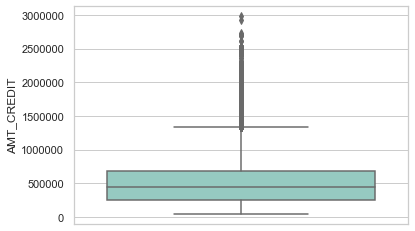

In [1405]:
ax=sns.boxplot(y=df_credit.toPandas()["AMT_CREDIT"],palette='Set3')


In [1406]:
df_credit=df_credit.filter(df_credit['AMT_CREDIT']<1300000)

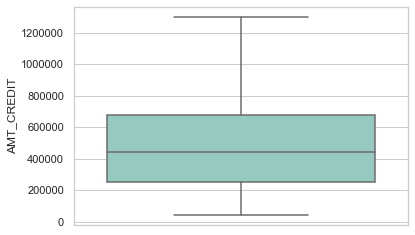

In [1407]:
ax=sns.boxplot(y=df_credit.toPandas()["AMT_CREDIT"],palette='Set3')

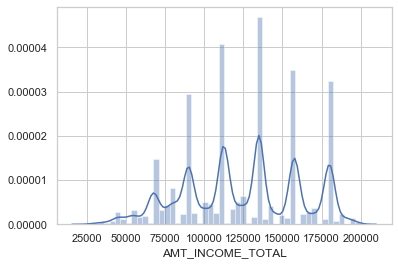

In [1408]:
sns.distplot(df_income.toPandas()["AMT_INCOME_TOTAL"])

In terms of cledit loan we will consider the amount less then 1300000.

In [1409]:
df=df.filter(df['AMT_CREDIT']<1300000)

In [1410]:
print('We are still keeping', round(df.count()/307493,2), 'of whole dataset')

We are still keeping 0.69 of whole dataset


AMT_ANNUITY: Loan Annuity 

An annuity is a series of payments made at equal intervals.Examples of annuities are regular deposits to a savings account, monthly home mortgage payments, monthly insurance payments and pension payments. Annuities can be classified by the frequency of payment dates. The payments (deposits) may be made weekly, monthly, quarterly, yearly, or at any other regular interval of time.

In [1411]:
df_annuity=df.select('AMT_ANNUITY')

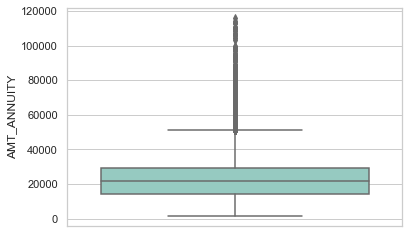

In [1412]:
ax=sns.boxplot(y=df_annuity.toPandas()['AMT_ANNUITY'], palette='Set3')

In [1413]:
df_annuity.describe().show()

+-------+------------------+
|summary|       AMT_ANNUITY|
+-------+------------------+
|  count|            213059|
|   mean| 22848.05156318203|
| stddev|10842.304064524056|
|    min|            1615.5|
|    max|          115803.0|
+-------+------------------+



In [1414]:
df_annuity=df_annuity.filter(df_annuity['AMT_ANNUITY']<50000)

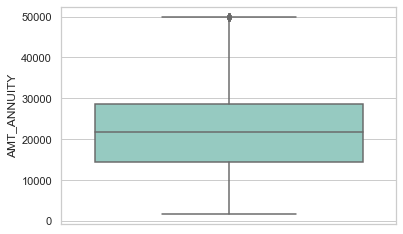

In [1415]:
ax=sns.boxplot(y=df_annuity.toPandas()['AMT_ANNUITY'], palette='Set3')

In [1416]:
df=df.filter(df['AMT_ANNUITY']<50000)

In [1417]:
print('We are still keeping', round(df.count()/307493,2), 'of whole dataset')

We are still keeping 0.68 of whole dataset


NAME_INCOME_TYPE: Client income type (bussinessman, working, maternity leave)

In [1420]:
df.select('NAME_INCOME_TYPE').distinct().show()

+--------------------+
|    NAME_INCOME_TYPE|
+--------------------+
|             Student|
|Commercial associate|
|         Businessman|
|     Maternity leave|
|       State servant|
|             Working|
|           Pensioner|
|          Unemployed|
+--------------------+



In [1421]:
INC_TYPE_indexer=StringIndexer(inputCol='NAME_INCOME_TYPE', outputCol='INCOME_TYPE').fit(df)
df=INC_TYPE_indexer.transform(df)
df.select('NAME_INCOME_TYPE','INCOME_TYPE').distinct().show()

IllegalArgumentException: 'requirement failed: Output column INCOME_TYPE already exists.'

In [1314]:
INCOME_TYPE_encoder=OneHotEncoder(inputCol="INCOME_TYPE", outputCol="INCOME_TYPE_Vector")
df = INCOME_TYPE_encoder.transform(df)

NAME_EDUCATION_TYPE: Level of highest education the client achived


In [1315]:
df.select('NAME_EDUCATION_TYPE').distinct().show()

+--------------------+
| NAME_EDUCATION_TYPE|
+--------------------+
|     Academic degree|
|   Incomplete higher|
|Secondary / secon...|
|     Lower secondary|
|    Higher education|
+--------------------+



In [1316]:
EDU_TYPE_indexer=StringIndexer(inputCol='NAME_EDUCATION_TYPE', outputCol='EDU_TYPE').fit(df)
df=EDU_TYPE_indexer.transform(df)
df.select('NAME_EDUCATION_TYPE','EDU_TYPE').distinct().show()

+--------------------+--------+
| NAME_EDUCATION_TYPE|EDU_TYPE|
+--------------------+--------+
|     Academic degree|     4.0|
|     Lower secondary|     3.0|
|   Incomplete higher|     2.0|
|    Higher education|     1.0|
|Secondary / secon...|     0.0|
+--------------------+--------+



In [1317]:
EDU_TYPE_encoder=OneHotEncoder(inputCol="EDU_TYPE", outputCol="EDU_TYPE_Vector")
df = EDU_TYPE_encoder.transform(df)

NAME_FAMILY_STATUS: Family status of client

In [1318]:
df.select('NAME_FAMILY_STATUS').distinct().show()

+--------------------+
|  NAME_FAMILY_STATUS|
+--------------------+
|           Separated|
|             Married|
|Single / not married|
|               Widow|
|      Civil marriage|
+--------------------+



In [1319]:
FAMILY_indexer=StringIndexer(inputCol='NAME_FAMILY_STATUS', outputCol='FAMILY').fit(df)
df=FAMILY_indexer.transform(df)
df.select('NAME_FAMILY_STATUS','FAMILY').distinct().show()

+--------------------+------+
|  NAME_FAMILY_STATUS|FAMILY|
+--------------------+------+
|      Civil marriage|   2.0|
|               Widow|   4.0|
|           Separated|   3.0|
|Single / not married|   1.0|
|             Married|   0.0|
+--------------------+------+



In [1320]:
FAMILY_encoder=OneHotEncoder(inputCol="FAMILY", outputCol="FAMILY_Vector")
df = FAMILY_encoder.transform(df)

NAME_HOUSING_TYPE:What is the housing situation of the client (renting, living with parents, etc...)


In [1321]:
df.select('NAME_HOUSING_TYPE').distinct().show()

+-------------------+
|  NAME_HOUSING_TYPE|
+-------------------+
|  House / apartment|
|Municipal apartment|
|    Co-op apartment|
|   Rented apartment|
|   Office apartment|
|       With parents|
+-------------------+



In [1322]:
HOUS_TYPE_indexer=StringIndexer(inputCol='NAME_HOUSING_TYPE', outputCol='HOUSE_TYPE').fit(df)
df=HOUS_TYPE_indexer.transform(df)
df.select('NAME_HOUSING_TYPE','HOUSE_TYPE').distinct().show()

+-------------------+----------+
|  NAME_HOUSING_TYPE|HOUSE_TYPE|
+-------------------+----------+
|  House / apartment|       0.0|
|       With parents|       1.0|
|   Office apartment|       4.0|
|Municipal apartment|       2.0|
|   Rented apartment|       3.0|
|    Co-op apartment|       5.0|
+-------------------+----------+



In [1323]:
HOUSE_TYPE_encoder=OneHotEncoder(inputCol="HOUSE_TYPE", outputCol="HOUSE_TYPE_Vector")
df = HOUSE_TYPE_encoder.transform(df)

DAYS_BIRTH: Client's age in days at the time of application

In [1324]:
df.select('DAYS_BIRTH').show() #Days of the year is 365.25

+----------+
|DAYS_BIRTH|
+----------+
|    -19046|
|    -19005|
|    -19932|
|    -16941|
|    -20099|
|    -14469|
|    -10197|
|    -20417|
|    -13439|
|    -14583|
|     -8728|
|    -12931|
|     -9776|
|    -17718|
|    -11348|
|    -18252|
|    -24827|
|    -11286|
|    -19334|
|    -18724|
+----------+
only showing top 20 rows



Age values are given in terms of days and in minus value, we need to convert them to reasonable age data.

In [1325]:
import pyspark.sql.functions as func

In [1326]:
df=df.withColumn('AGE',func.round(-df.DAYS_BIRTH/365,0).cast('integer'))

In [1327]:
df_AGE=df.select('AGE')
df_AGE.describe().show()

+-------+------------------+
|summary|               AGE|
+-------+------------------+
|  count|            208878|
|   mean|  44.2272953590134|
| stddev|12.476177733395613|
|    min|                21|
|    max|                69|
+-------+------------------+



All age values seems relevant and can be used through the analysis.

DAYS_EMPLOYED: HOw many days before the application the person started current employement


In [1328]:
df=df.withColumn('YEAR_EMP',func.round(-df.DAYS_EMPLOYED/365,0).cast('integer'))

In [1329]:
df_YEAR_EMPLOYED=df.select('YEAR_EMP')
df_YEAR_EMPLOYED.describe().show()

+-------+-------------------+
|summary|           YEAR_EMP|
+-------+-------------------+
|  count|             208878|
|   mean|-206.96514711937112|
| stddev|  411.5876931161294|
|    min|              -1001|
|    max|                 49|
+-------+-------------------+



In the dataset we have some values as 365243 which do not correspond with the other values.


In [1330]:
df.filter(df['DAYS_EMPLOYED']==365243).count()/df.count()

0.21175039975488083

%21 of whole data has same value, dropping them will cause a significant loss of data. Rather then dropping them we will deal with assigning a mean value what the rest of the data has.

In [1331]:
df.filter(df['DAYS_EMPLOYED']<0).toPandas()['DAYS_EMPLOYED'].mean()/365.25

-6.33562582566228

In [1332]:
from pyspark.sql.functions import col, when

We need to apply conditional assignment based on the value. 

In [1333]:
df=df.withColumn("YEAR_EMP", when(col('DAYS_EMPLOYED')<0,func.round(-df.DAYS_EMPLOYED/365,0).cast('integer')).otherwise(6))

In [1334]:
df.select('YEAR_EMP').describe().show()

+-------+-----------------+
|summary|         YEAR_EMP|
+-------+-----------------+
|  count|           208878|
|   mean|6.267562883597123|
| stddev|5.693776504143547|
|    min|                0|
|    max|               49|
+-------+-----------------+



Now, all values seem reasonable.

OWN_CAR_AGE has only 0 and value so we will disregard this data

FLAG_MOBIL; 
FLAG_EMP_PHONE; 
FLAG_WORK_PHONE; 
FLAG_PHONE; 

All be used as is since they are designated as 0 and 1 as integer.


OCCUPATION_TYPE is given as numbers, we cant't use them since they are not defined. So we will desregard this data as well.


CNT_FAM_MEMBERS; 
REGION_RATING_CLIENT; 
REGION_RATING_CLIENT_W_CITY; 
REG_REGION_NOT_LIVE_REGION; 
REG_REGION_NOT_WORK_REGION; 

Values will be used as is with 0 and 1 values. 


In [1335]:
df.select('ORGANIZATION_TYPE').distinct().count()

58

There are too much distict values, so for the machine learning algorithm it will not create a significant difference, and inputting data will be diffucult. For a seperate project it can be reduced and aggregated to common organization types.

In [1336]:
df.select('FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5').distinct().show()


+---------------+---------------+---------------+---------------+
|FLAG_DOCUMENT_2|FLAG_DOCUMENT_3|FLAG_DOCUMENT_4|FLAG_DOCUMENT_5|
+---------------+---------------+---------------+---------------+
|              0|              0|              0|              1|
|              0|              0|              0|              0|
|              1|              0|              0|              0|
|              0|              0|              1|              0|
|              0|              1|              0|              0|
+---------------+---------------+---------------+---------------+



In [1337]:
df.select('FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10').distinct().show()

+---------------+---------------+---------------+---------------+----------------+
|FLAG_DOCUMENT_6|FLAG_DOCUMENT_7|FLAG_DOCUMENT_8|FLAG_DOCUMENT_9|FLAG_DOCUMENT_10|
+---------------+---------------+---------------+---------------+----------------+
|              0|              0|              0|              0|               0|
|              1|              0|              0|              1|               0|
|              0|              1|              0|              0|               0|
|              0|              0|              1|              0|               0|
|              1|              0|              0|              0|               0|
|              0|              0|              0|              1|               0|
+---------------+---------------+---------------+---------------+----------------+



In [1338]:
df.select('FLAG_DOCUMENT_2').toPandas()['FLAG_DOCUMENT_2'].unique()

array([0, 1], dtype=int64)

* Spark SQL distinct function and Pandas unique function are not giving the same results. 

In [1340]:
#df.toPandas().to_csv('E:/BDA 105/Files/Data_Fnl.csv')

# BUILDING LOGISTIC REGRESSION MODEL TO FINAL DATASET

In [1351]:
df_assembler = VectorAssembler(inputCols=['NCT_Vector','GENDER_Vector','CAR_Vector','HOUSE_Vector','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
        'INCOME_TYPE_Vector','EDU_TYPE_Vector','FAMILY_Vector','HOUSE_TYPE_Vector','AGE','YEAR_EMP','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
        'FLAG_CONT_MOBILE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_WORK_REGION',
        'REG_REGION_NOT_LIVE_REGION','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
        'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9'],outputCol='features')

In [1352]:
df = df_assembler.transform(df)

IllegalArgumentException: 'Output column features already exists.'

In [1343]:
df.printSchema()

root
 |-- TARGET: integer (nullable = true)
 |-- NAME_CONTRACT_TYPE: string (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- AMT_CREDIT: double (nullable = true)
 |-- AMT_ANNUITY: double (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- DAYS_BIRTH: integer (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- OWN_CAR_AGE: integer (nullable = true)
 |-- FLAG_MOBIL: integer (nullable = true)
 |-- FLAG_EMP_PHONE: integer (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_CONT_MOBILE: integer (nullable = true)
 |-- FLAG_PHONE: double (nullable = true)
 |-- OCCUPATION_TYPE: integer (nul

In [1344]:
df.select(['features','TARGET']).show()

+--------------------+------+
|            features|TARGET|
+--------------------+------+
|(47,[3,5,6,7,8,15...|     0|
|(47,[0,1,2,3,5,6,...|     0|
|(47,[0,2,3,5,6,7,...|     0|
|(47,[0,2,3,5,6,7,...|     0|
|(47,[0,1,2,3,5,6,...|     0|
|(47,[2,3,5,6,7,8,...|     0|
|(47,[0,1,2,3,4,5,...|     0|
|(47,[0,1,2,3,5,6,...|     0|
|(47,[0,1,2,3,5,6,...|     0|
|(47,[0,1,2,3,5,6,...|     0|
|(47,[0,3,5,6,7,8,...|     0|
|(47,[0,2,5,6,7,8,...|     0|
|(47,[1,2,3,4,5,6,...|     0|
|(47,[1,2,3,5,6,7,...|     0|
|(47,[0,1,2,3,4,5,...|     0|
|(47,[3,5,6,7,8,15...|     0|
|(47,[0,1,2,3,5,6,...|     0|
|(47,[0,4,5,6,7,8,...|     0|
|(47,[0,1,2,3,5,6,...|     0|
|(47,[0,1,2,3,5,6,...|     1|
+--------------------+------+
only showing top 20 rows



In [1345]:
model_df=df.select(['features','TARGET'])

In [1346]:
training_df,test_df=model_df.randomSplit([0.75,0.25])

In [1347]:
from pyspark.ml.classification import LogisticRegression

In [1348]:
log_reg=LogisticRegression(labelCol='TARGET').fit(training_df)

In [1349]:
train_results=log_reg.evaluate(training_df).predictions

In [1350]:
train_results.filter(train_results['TARGET']==1).filter(train_results['prediction']==1).select(['TARGET','prediction','probability']).show(10,False)

+------+----------+-----------+
|TARGET|prediction|probability|
+------+----------+-----------+
+------+----------+-----------+



In [1208]:
results=log_reg.evaluate(test_df).predictions

In [1209]:
results.printSchema()

root
 |-- features: vector (nullable = true)
 |-- TARGET: integer (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [1211]:
results.select(['TARGET','prediction']).show()

+------+----------+
|TARGET|prediction|
+------+----------+
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       0.0|
|     1|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
+------+----------+
only showing top 20 rows



Confusion Matrix 

We will manually create the variables for true positives, true negatives,
false positives, and false negatives to understand them better rather than
using the direct inbuilt function.

In [1212]:
tp = results[(results.TARGET == 1) & (results.prediction== 1)].count()
tn = results[(results.TARGET == 0) & (results.prediction== 0)].count()
fp = results[(results.TARGET == 0) & (results.prediction== 1)].count()
fn = results[(results.TARGET == 1) & (results.prediction== 0)].count()

In [1214]:
print(tp,tn,fp,fn)

1 47876 5 4416


Accuracy

Accuracy is the most basic metric for evaluating any classifier; however, this is not the right indicator of
the performance of the model due to dependency on the target class balance.

In [1224]:
accuracy=float((tp+tn) /(results.count()))
print(accuracy)

0.9154652185552029


Recall

Recall rate shows how much of the positive class cases we are able to
predict correctly out of the total positive class observations.

In [1220]:
recall = float(tp/(tp + fn))
print(recall)

0.00022639800769753225


Precision

Precision rate talks about the number of true positives predicted correctly out of all the predicted positives observations.

In [1223]:
precision = float(tp) / (tp +fp)
print(precision)

0.16666666666666666


In [1241]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator


In [1244]:
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(prediction))


NameError: name 'prediction' is not defined

# Build and Train Random Forest Model

In [1226]:
from pyspark.ml.classification import RandomForestClassifier

In [1228]:
rf_classifier=RandomForestClassifier(labelCol='TARGET',numTrees=50).fit(training_df)

In [1229]:
rf_predictions=rf_classifier.transform(test_df)

In [1230]:
rf_predictions.show()

+--------------------+------+--------------------+--------------------+----------+
|            features|TARGET|       rawPrediction|         probability|prediction|
+--------------------+------+--------------------+--------------------+----------+
|(47,[0,1,2,3,4,5,...|     0|[45.4396914162119...|[0.90879382832423...|       0.0|
|(47,[0,1,2,3,4,5,...|     0|[45.5559614801503...|[0.91111922960300...|       0.0|
|(47,[0,1,2,3,4,5,...|     0|[45.7297445338290...|[0.91459489067658...|       0.0|
|(47,[0,1,2,3,4,5,...|     0|[45.6378045693435...|[0.91275609138687...|       0.0|
|(47,[0,1,2,3,4,5,...|     0|[45.7025083344414...|[0.91405016668882...|       0.0|
|(47,[0,1,2,3,4,5,...|     0|[45.7897468410601...|[0.91579493682120...|       0.0|
|(47,[0,1,2,3,4,5,...|     0|[45.4029222142268...|[0.90805844428453...|       0.0|
|(47,[0,1,2,3,4,5,...|     1|[45.3076471640647...|[0.90615294328129...|       0.0|
|(47,[0,1,2,3,4,5,...|     1|[45.8188216913882...|[0.91637643382776...|       0.0|
|(47

In [1232]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [1233]:
rf_accuracy=MulticlassClassificationEvaluator(labelCol='TARGET',metricName='accuracy').evaluate(rf_predictions)

In [1234]:
print('The accuracy of RF on test data is {0:.0%}'.format(rf_accuracy))

The accuracy of RF on test data is 92%


In [1236]:
rf_precision=MulticlassClassificationEvaluator(labelCol='TARGET',metricName='weightedPrecision').evaluate(rf_predictions)

In [1237]:
print('The precision rate on test data is {0:.0%}'.format(rf_precision))

The precision rate on test data is 84%


In [1240]:
rf_classifier.featureImportances

SparseVector(47, {0: 0.0003, 1: 0.0998, 2: 0.0065, 3: 0.0006, 4: 0.0094, 5: 0.0016, 6: 0.0332, 7: 0.0302, 8: 0.0452, 9: 0.1114, 10: 0.0016, 11: 0.0004, 12: 0.0201, 14: 0.0014, 15: 0.0181, 16: 0.0427, 18: 0.001, 19: 0.0007, 20: 0.002, 21: 0.0002, 22: 0.0002, 24: 0.0039, 25: 0.0017, 26: 0.0029, 27: 0.0004, 28: 0.1463, 29: 0.214, 30: 0.1064, 31: 0.0019, 32: 0.0007, 33: 0.0035, 34: 0.0404, 36: 0.0003, 38: 0.0342, 40: 0.001, 41: 0.0152, 46: 0.0004})